In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass_data=pd.read_csv('glass.csv')
glass_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
x=glass_data.iloc[:,:-1]
y=glass_data.iloc[:,-1:]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

In [9]:
y_pred=knn_model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
print(accuracy_score(y_test,y_pred))

0.6511627906976745


In [12]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0  0  0  0]
 [ 7 11  0  0  0  0]
 [ 1  0  1  0  0  0]
 [ 0  5  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


<AxesSubplot:>

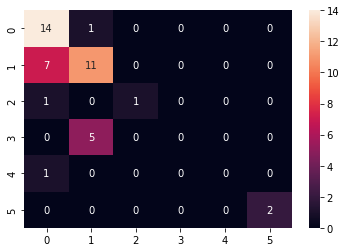

In [13]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.61      0.93      0.74        15
           2       0.65      0.61      0.63        18
           3       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.65        43
   macro avg       0.54      0.51      0.51        43
weighted avg       0.58      0.65      0.60        43



### Tweaking K value

In [15]:
for i in range(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
0.7209302325581395
K value is:  3
0.7906976744186046
K value is:  5
0.7209302325581395
K value is:  7
0.7209302325581395
K value is:  9
0.627906976744186
K value is:  11
0.6511627906976745
K value is:  13
0.6046511627906976
K value is:  15
0.627906976744186
K value is:  17
0.6511627906976745
K value is:  19
0.627906976744186
K value is:  21
0.627906976744186
K value is:  23
0.6511627906976745
K value is:  25
0.6511627906976745
K value is:  27
0.6511627906976745
K value is:  29
0.6511627906976745
K value is:  31
0.6511627906976745
K value is:  33
0.627906976744186
K value is:  35
0.627906976744186
K value is:  37
0.6511627906976745
K value is:  39
0.6511627906976745
K value is:  41
0.6511627906976745
K value is:  43
0.6511627906976745
K value is:  45
0.6511627906976745
K value is:  47
0.6511627906976745
K value is:  49
0.627906976744186
